In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# Read the input file
water_chars = pd.read_csv('water_potability.csv')

In [62]:
# Check the input file for any missing values and other characteristics as required
water_chars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [63]:
water_chars.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [64]:
water_chars.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [65]:
water_chars.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [66]:
#Take a backup
water_param = water_chars.copy()

In [67]:
#Assign X & Y
X = water_chars.drop('Potability',axis=1)
y = water_chars['Potability']

In [68]:
# Split the data into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

In [71]:
# Create a function to fill the missing values with median
def fill_missing(data,train,miss_cols):
    for col in range(0,len(miss_cols)):
        median = train[miss_cols[col]].median()
        data[miss_cols[col]].fillna(median,inplace=True)

In [75]:
missing_cols_train = X_train.columns[X_train.isnull().any()].tolist()
fill_missing(X_train,X_train,missing_cols_train)

C:\Users\mail2\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [99]:
# Fill the missing value in X_test
missing_cols_test = X_test.columns[X_test.isnull().any()].tolist()
fill_missing(X_test,X_train,missing_cols_test)

C:\Users\mail2\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [109]:
# get the correlation
corr = water_chars.corr()

<AxesSubplot:>

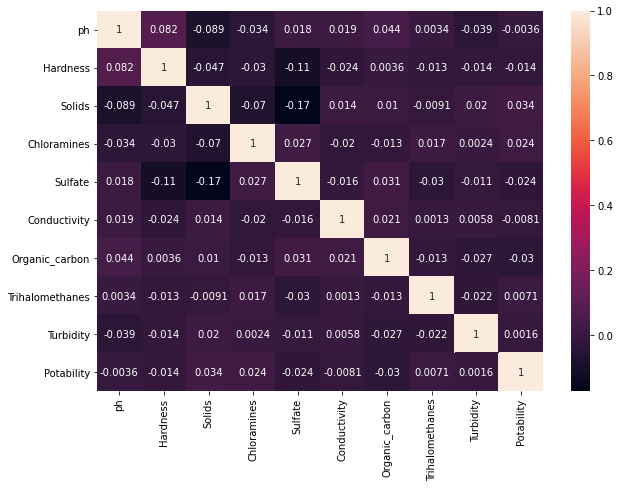

In [110]:
# Plot a heat map on the correlation
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [114]:
corr['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [128]:
#Find the best model based on score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(n_estimators=100,min_samples_leaf=2,random_state=42),
          "Support Vector": SVC(kernel='rbf'),
          "Naive Bayes": GaussianNB()}

model_score = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    model_score[model_name] = model.score(X_test,y_test)

model_score

{'Logistic Regression': 0.6280487804878049,
 'Random Forest': 0.676829268292683,
 'Support Vector': 0.6280487804878049,
 'Naive Bayes': 0.6280487804878049}

In [129]:
# Let us do a feature scaling and see if that makes any difference

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [146]:
#Find the best model based on score on the scaled training & test set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(n_estimators=100,min_samples_leaf=2),
          "Support Vector": SVC(kernel='rbf'),
          "Naive Bayes": GaussianNB(),
          "KNN": KNeighborsClassifier(n_neighbors=5)}

model_score = {}
for model_name, model in models.items():
    model.fit(scaled_x_train,y_train)
    model_score[model_name] = model.score(scaled_x_test,y_test)

model_score

{'Logistic Regression': 0.6280487804878049,
 'Random Forest': 0.6890243902439024,
 'Support Vector': 0.6905487804878049,
 'Naive Bayes': 0.6326219512195121,
 'KNN': 0.6295731707317073}

In [147]:
rand_clas = RandomForestClassifier()
rand_clas.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter tuning for Random forest and Support vector

In [149]:
from sklearn.model_selection import GridSearchCV

rand_clas = RandomForestClassifier()

grid = {"criterion": ['gini','entropy'],
        "max_features": ['auto','sqrt'],
        "min_samples_leaf": [1,2],
        "n_estimators": [30,100,120]}

rand_for_grid = GridSearchCV(estimator=rand_clas,
                             param_grid=grid,
                             cv=5,
                             verbose=2,
                             scoring='accuracy')

rand_for_grid.fit(scaled_x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=30, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_features=auto, min_samples_leaf=

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=120 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=120, total=   0.6s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=120 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, n_estimators=120, total=   0.6s
[CV] criterion=gini, max_features=sqrt, min_samples_

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=100 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120, total=   1.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120, total=   1.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120, total=   1.0s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, n_estimators=120, total=   1.0s
[CV] criterion=entr

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [30, 100, 120]},
             scoring='accuracy', verbose=2)

In [162]:
# Hyperparameter tuning for Support Vector

In [163]:
from sklearn.model_selection import GridSearchCV

sv_clas = SVC()

svgrid = {"C": [1.0,2.0,4.0],
        "decision_function_shape": ['ovo','ovr'],
        "gamma": ['scale','auto'],
        "kernel": ['rbf','sigmoid']}

sv_for_grid = GridSearchCV(estimator=sv_clas,
                             param_grid=svgrid,
                             cv=5,
                             verbose=2,
                             scoring='accuracy')

sv_for_grid.fit(scaled_x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.1s
[CV] C=1.0, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=1.0, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   

[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid ..
[CV]  C=2.0, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C=2.0, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=2.0, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=2.0, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=2.0, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=2.0, decision_function_shape=ovr, gamma=scale, kernel=rbf .....
[CV]  C=2.0, decision_function_shape=ovr, gamma=scale, kernel=rbf, total=   

[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=4.0, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ..
[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C=4.0, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ..
[CV]  C=4.0, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, total=   0.1s
[CV] C

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   15.5s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [170]:
rand_pred = rand_for_grid.predict(scaled_x_test)
svc_pred = sv_for_grid.predict(scaled_x_test)

In [172]:
# Evaluate the performance

Text(294.49090909090904, 0.5, 'True Label')

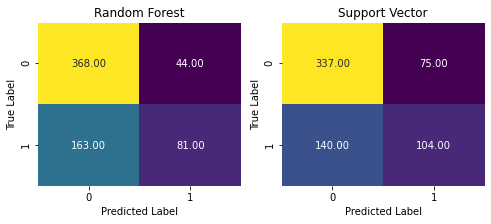

In [193]:
from sklearn.metrics import confusion_matrix, classification_report

rand_cm = confusion_matrix(y_test,rand_pred)
svc_cm = confusion_matrix(y_test,svc_pred)

fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.heatmap(rand_cm,ax=ax[0],annot=True,cbar=False,fmt='.2f',cmap='viridis')
ax[0].set_title('Random Forest')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(svc_cm,ax=ax[1],annot=True,cbar=False,fmt='.2f',cmap='viridis')
ax[1].set_title('Support Vector')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

In [194]:
rand_cf = classification_report(y_test,rand_pred)
svc_cf = classification_report(y_test,svc_pred)

print(rand_cf)
print('\n')
print(svc_cf)

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.65      0.33      0.44       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.68      0.65       656



              precision    recall  f1-score   support

           0       0.71      0.82      0.76       412
           1       0.58      0.43      0.49       244

    accuracy                           0.67       656
   macro avg       0.64      0.62      0.62       656
weighted avg       0.66      0.67      0.66       656



Text(0.5, 1.0, 'ROC Curve')

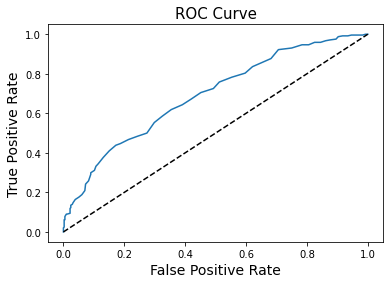

In [223]:
#Plot Roc curve
from sklearn.metrics import roc_curve

y_score = rand_for_grid.predict_proba(scaled_x_test)
y_proba = y_score[:,1]
fpr_forest,tpr_forest,thres_forest = roc_curve(y_test,y_proba)

plt.plot(fpr_forest,tpr_forest)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)

Text(0.5, 1.0, 'Precision Vs Recall')

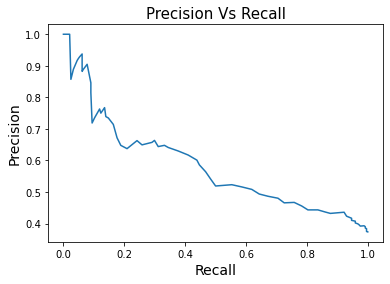

In [230]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test,y_proba)

plt.plot(recall,precision)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.title('Precision Vs Recall',fontsize=15)

In [ ]:
# Overall result does not look good. 